In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score 

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'


try:
    data_path = './csvFiles/rough_surface_statistics.csv'
    rough_dat = pd.read_csv(data_path, header = None)
    feature_name = rough_dat.iloc[0, :].values
    data_rough = rough_dat.iloc[1:, 1:-1].values.astype(float)
    labels = rough_dat.iloc[1:, -1].values
    case_names = rough_dat.iloc[1:, 0].values
except FileNotFoundError:
    print(f"File not found: {data_path}")

feature_name_delete = feature_name[1:-1]

print('Feature names:', feature_name_delete)

names_ = [r'$S_x$', r'$k_{avg}$', r'$k_{rms}$', r'$Ra$', r'$I_x$',
          r'$P_o$', r'$E_x$', r'$S_k$', r'$K_u$', r'$k_s$']

names_all = [r'$S_x$', r'$k_{avg}$', r'$K_c$', r'$K_t$', r'$k_{rms}$',
            r'$Ra$', r'$I_x$',r'$I_z$',r'$P_o$', r'$E_x$', r'$E_z$',
            r'$S_k$', r'$K_u$', r'$k_s$']


used_col = [0, 1, 4, 5, 6, 8, 9, 11, 12, 13]
used_col_all = [0, 1, 2,3,4, 5, 6, 7,8, 9, 10,11, 12, 13]

id_DNS,id_DNSle,id_DNSlc,id_DNSF,id_EXP = np.where((labels == 'DNS'))[0],np.where((labels == 'DNSLE'))[0],np.where((labels == 'DNSLC'))[0],np.where((labels == 'DNSF'))[0],np.where((labels == 'EXP'))[0]
print(f"DNS: {len(id_DNS)}, DNSLE: {len(id_DNSle)}, DNSLC: {len(id_DNSlc)}, DNSF: {len(id_DNSF)}, EXP: {len(id_EXP)}")

# [85  86  89  90  92  94  95  96  99 100]
# id_DNSlc = np.array([85,  86 , 90  ,94 , 95 ,96  ,99 ,100,])

input_data = data_rough[:, used_col]


Sx,kavg,krms,Ra,Ix,Po,Ex,Sk,Ku,ks = input_data[:,0].reshape(-1, 1), input_data[:,1].reshape(-1, 1), \
    input_data[:,2].reshape(-1, 1), input_data[:,3].reshape(-1, 1), \
    input_data[:,4].reshape(-1, 1), input_data[:,5].reshape(-1, 1), \
    input_data[:,6].reshape(-1, 1), input_data[:,7].reshape(-1, 1), \
    input_data[:,8].reshape(-1, 1), input_data[:,9].reshape(-1, 1)

kt = data_rough[:,3].reshape(-1, 1)  # Kt
Iz,Ez = data_rough[:,7].reshape(-1, 1), data_rough[:,10].reshape(-1, 1)  # Iz, Ez

Feature names: ['Sx' 'kbar_ch' 'kc_ch' 'kt_ch' 'krms_ch' 'Ra_ch' 'incx_ch' 'incz_ch'
 'pro_ch' 'ESx_ch' 'ESz_ch' 'sk_ch' 'ku_ch' 'ks']
DNS: 28, DNSLE: 24, DNSLC: 8, DNSF: 31, EXP: 13


In [2]:
# Dictionary for plot settings
dic_1 = {
    "xlab_font": 15, "ylab_font": 15, "tick_size_x": 13, "tick_size_y": 13, "tick_size_z": 13,
    'title_size_foor':15,
}
dic_diag = {
    "xlab_font": 15, "ylab_font": 15, "tick_size_x": 13, "tick_size_y": 13,
    'xlabel':15,'ylabel':15,
}
legend_size , capter_size = 12,17
capter_x, capter_y = -0.25, 1.05


sk_config = {'lim':(-1.5,2.6),'major':1}
Po_config = {'lim':(0.2,0.95),'major':0.3}
Ex_config = {'lim':(0.1,1.2),'major':0.4}
kavg_config = {'lim':(0,0.5),'major':0.2}
Sx_config = {'lim':(0.01,0.8),'major':0.3}

plot_settings = {(0,0):{'xlim':Po_config['lim'],'ylim':(5,12),
                        'x_major':Po_config['major'],'y_major':1,},
                (0,1):{'xlim':Ex_config['lim'],'ylim':Po_config['lim'],'zlim':(0,15),
                        'x_major':Ex_config['major'],'y_major':Po_config['major'],'z_major':5,},
                (0,2):{'xlim':sk_config['lim'],'ylim':Po_config['lim'],'zlim':(0,40),
                        'x_major':sk_config['major'],'y_major':Po_config['major'],'z_major':20},
                (0, 3): {'xlim': kavg_config['lim'], 'ylim': Po_config['lim'], 'zlim': (2, 6),
                        'x_major': kavg_config['major'], 'y_major': Po_config['major'], 'z_major': 2}, 
                (0, 4): {'xlim': Sx_config['lim'], 'ylim': Po_config['lim'], 'zlim': (0, 50),
                        'x_major': Sx_config['major'], 'y_major': Po_config['major'], 'z_major': 20}, 

                (1, 1): {'xlim': Ex_config['lim'], 'ylim': (0.2, 1.0),
                        'x_major': Ex_config['major'], 'y_major': 0.2}, 

                (1, 2): {'xlim': sk_config['lim'], 'ylim': Ex_config['lim'], 'zlim': (0, 4),
                        'x_major': sk_config['major'], 'y_major': Ex_config['major'], 'z_major': 2}, # Used Ex_config

                (1, 3): {'xlim': kavg_config['lim'], 'ylim': Ex_config['lim'], 'zlim': (0, 0.6),
                        'x_major': kavg_config['major'], 'y_major': Ex_config['major'], 'z_major': 0.2}, # Used Ex_config, kavg_config

                (1, 4): {'xlim': Sx_config['lim'], 'ylim': Ex_config['lim'], 'zlim': (0, 5),
                        'x_major': Sx_config['major'], 'y_major': Ex_config['major'], 'z_major': 2}, # Used Ex_config, Sx_config

                # Row 2 (sk)
                (2, 2): {'xlim': sk_config['lim'], 'ylim': (0.2, 3.5),
                        'x_major': sk_config['major'], 'y_major': 1.0}, # y_major added (assuming 1.0 based on range)

                (2, 3): {'xlim': kavg_config['lim'], 'ylim': sk_config['lim'], 'zlim': (0, 2.2),
                        'x_major': kavg_config['major'], 'y_major': sk_config['major'], 'z_major': 1}, # Used sk_config, kavg_config

                (2, 4): {'xlim': Sx_config['lim'], 'ylim': sk_config['lim'], 'zlim': (0, 15),
                        'x_major': Sx_config['major'], 'y_major': sk_config['major'], 'z_major': 5}, # Used sk_config, Sx_config

                # Row 3 (kavg)
                (3, 3): {'xlim': kavg_config['lim'], 'ylim': (0.2, 0.62),
                        'x_major': kavg_config['major'], 'y_major': 0.1}, # y_major added (assuming 0.1 based on range)

                (3, 4): {'xlim': Sx_config['lim'], 'ylim': kavg_config['lim'], 'zlim': (0, 2.7),
                        'x_major': Sx_config['major'], 'y_major': kavg_config['major'], 'z_major': 0.8}, # Used kavg_config, Sx_config

                # Row 4 (Sx)
                (4, 4): {'xlim': Sx_config['lim'], 'ylim': (0.9, 4.5),
                        'x_major': Sx_config['major'], 'y_major': 1.0}, # y_major added (assuming 1.0 based on range)
                }

plot_settings_foorghi_ = {(4,1):{'xlim':sk_config['lim'],'ylim':(0,4),
                                'x_major':sk_config['major'],'y_major':2,},
                        (3,0):{'xlim':Ex_config['lim'],'ylim':(0.2,1),
                               'x_major':Ex_config['major'],'y_major':0.2,},
                        (3,1):{'xlim': sk_config['lim'], 'ylim': Ex_config['lim'], 'zlim': (0, 8),
                        'x_major': sk_config['major'], 'y_major': Ex_config['major'], 'z_major': 4},}       


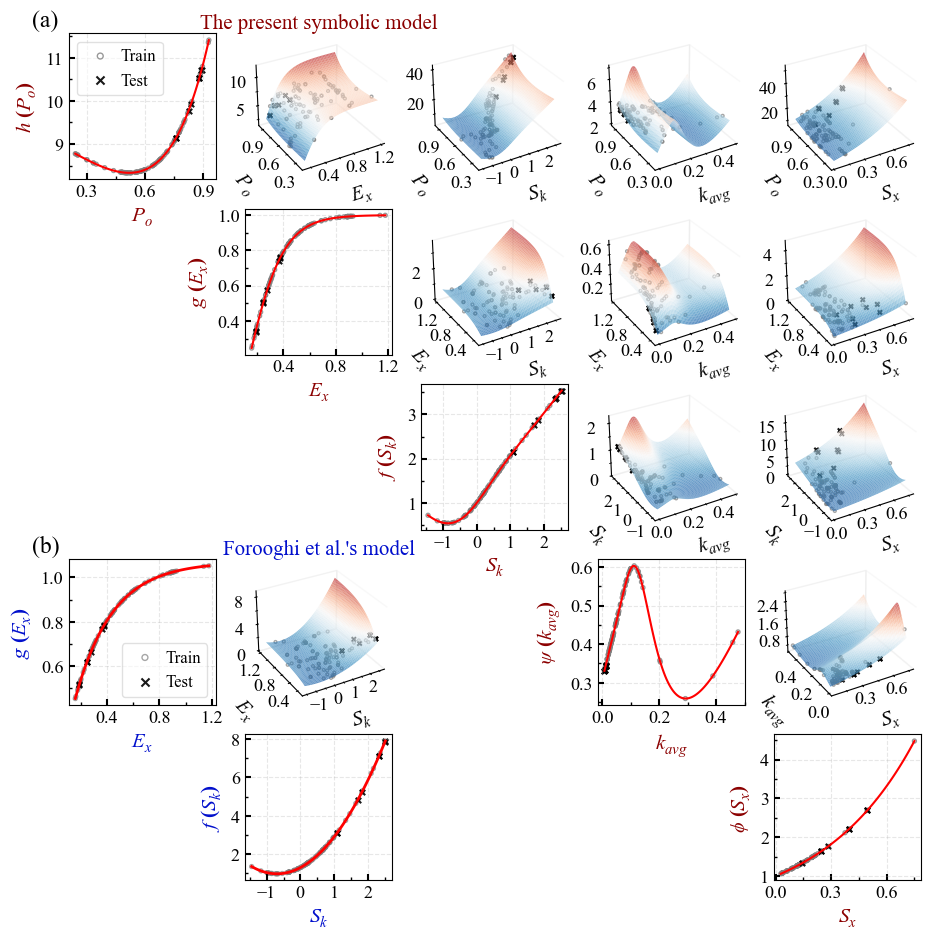

In [4]:
_path = os.getcwd()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 必须导入以支持3D绘图
from numpy import cos, exp, tanh, square
import matplotlib.colors as mcolors

id_not_DNSlc = np.where(labels != 'DNSLC')[0]

# ==========================================
# 定义函数
# ==========================================
def func_Po(x):
    return square(cos(x) - (x * exp(x))) + 8.331

def func_Ex(x):
    return tanh((x + -0.084) / 0.294)

def func_Sk(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        res = tanh(x) + (x / tanh(x))
    res = np.where(x==0, 1.0, res)
    return res

def func_kavg(x):
    return x + ((x + -0.692) - (tanh(-0.024 / square(x)) * exp(x)))

def func_Sx(x):
    return square(exp(x))


def func_Sk_foorghi(x):
    return 0.67*x**2 + 0.93*x + 1.3

def func_Ex_foorghi(x):
    return 1.07*(1-exp(-3.5*x))


cmap = plt.get_cmap('RdBu_r')
new_cmap = mcolors.LinearSegmentedColormap.from_list(
    'soft_RdBu_r',
    cmap(np.linspace(0.1, 0.85, 256)) 
)


vars_list = [Po, Ex, Sk, kavg, Sx]
funcs_list = [func_Po, func_Ex, func_Sk, func_kavg, func_Sx]
var_names = [r'$P_o$', r'$E_x$', r'$S_k$', r'$k_{avg}$', r'$S_x$']
template_names = [r'$h$',r'$g$',r'$f$',r'$\psi$',r'$\phi$']

if __name__ == "__main__":
    fig = plt.figure(figsize=(11, 11)) 

    rows, cols = 5, 5

    for i in range(rows):       # 行 (Y轴变量)
        for j in range(cols):   # 列 (X轴变量)
            
            # 计算子图的索引位置 (1-based index)
            plot_idx = i * cols + j + 1
            
            var_y = vars_list[i]
            func_y = funcs_list[i]
            var_x = vars_list[j]
            func_x = funcs_list[j]

            # === 情况 A: 对角线 (保持 2D 曲线，清晰直观) ===
            if i == j:
                ax = fig.add_subplot(rows, cols, plot_idx) # 默认 2D
                
                ls_x = np.linspace(var_x.min(), var_x.max(), 100)
                ls_y = func_x(ls_x)
                
                ax.plot(ls_x, ls_y, 'r-', linewidth=1.5)
                ax.scatter(var_x, func_x(var_x), marker = 'o', c='none', 
                            edgecolors='gray', s=8, alpha=0.8,label= 'Train')
                ax.scatter(var_x[id_DNSlc], func_x(var_x[id_DNSlc]),
                           marker = 'x',c='black',  s=15, alpha=0.9,label='Test')


                ax.set_xlabel(f'{var_names[j]}', fontsize=dic_diag['xlabel'],
                               color='darkred', fontweight='bold')
                
                ax.set_ylabel(f'{template_names[j]} ({var_names[j]})', 
                              fontsize=dic_diag['ylabel'],color='darkred', 
                              fontweight='bold', labelpad=5,)
                
                ax.grid(linestyle='--', alpha=0.3)
  
                ax.yaxis.set_major_locator(MultipleLocator(plot_settings[i,j]['y_major']))
                ax.xaxis.set_major_locator(MultipleLocator(plot_settings[i,j]['x_major']))
                ax.xaxis.set_minor_locator(AutoMinorLocator(2))
                ax.yaxis.set_minor_locator(AutoMinorLocator(2))
                ax.tick_params(axis='both', direction='in', length=4, width=1.5, colors='black')
                ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1, colors='black')  # 次刻度
                ax.tick_params(axis='x', which='major', labelsize=dic_diag["tick_size_x"])  
                ax.tick_params(axis='y', which='major', labelsize=dic_diag["tick_size_y"])

                if i == 0:
                    ax.legend(fontsize=legend_size, loc='upper left', 
                              framealpha=0.6,markerscale=1.5,handletextpad=0.2,)
                    ax.text(capter_x, capter_y, '(a)', transform=ax.transAxes,fontsize=capter_size,)

            # === 情况 B: 上三角 (绘制 3D Surface) ===
            elif i < j:
                ax = fig.add_subplot(rows, cols, plot_idx, projection='3d')
                
                x_surf = np.linspace(var_x.min(), var_x.max(), 50)
                y_surf = np.linspace(var_y.min(), var_y.max(), 50)
                X, Y = np.meshgrid(x_surf, y_surf)
                Z = func_y(Y) * func_x(X) # 计算联合响应
                
                surf = ax.plot_surface(X, Y, Z, cmap=new_cmap, 
                                    edgecolor='none', alpha=0.7, antialiased=True,)
                
                Z_data = func_y(var_y) * func_x(var_x)
                

                ax.scatter(var_x[id_not_DNSlc], var_y[id_not_DNSlc], Z_data[id_not_DNSlc],
                           marker = 'o', c='none', edgecolors='gray', s=4, alpha=0.7, depthshade=True,zorder=0)
                ax.scatter(var_x[id_DNSlc], var_y[id_DNSlc], Z_data[id_DNSlc],
                           marker = 'x',c='black',  s=10, alpha=0.9, depthshade=True,zorder=0)
                
                # 4. 设置标签
                ax.yaxis.set_major_locator(MultipleLocator(plot_settings[i,j]['y_major']))
                ax.xaxis.set_major_locator(MultipleLocator(plot_settings[i,j]['x_major']))
                ax.zaxis.set_major_locator(MultipleLocator(plot_settings[i,j]['z_major']))
                ax.zaxis.set_minor_locator(AutoMinorLocator(2))
                ax.xaxis.set_minor_locator(AutoMinorLocator(2))
                ax.yaxis.set_minor_locator(AutoMinorLocator(2))

                ax.set_xlabel(var_names[j], fontsize=dic_1["xlab_font"], labelpad=-2)
                ax.set_ylabel(var_names[i], fontsize=dic_1["ylab_font"], labelpad=3)
                ax.tick_params(axis='x', which='major', labelsize=dic_1["tick_size_x"],pad = -5)  
                ax.tick_params(axis='y', which='major', labelsize=dic_1["tick_size_y"],pad = -1)
                ax.tick_params(axis='z', which='major', labelsize=dic_1["tick_size_z"],pad = 0)    
                
                ax.tick_params(axis='both', which='major',length=6, width=1.5, colors='black')
                ax.tick_params(axis='both', which='minor', length=2, width=1, colors='black')  # 次刻度

                ax.view_init(elev=30, azim=-120) 

                if (i,j) in [(3,4),[0,4]]:
                    ax.set_xlim(plot_settings[i,j]['xlim'])
                #     ax.set_yticks([0.2,0.4])
                #     ax.set_yticklabels(['0.2','0.4'])
                    # ax.set_ylim(plot_settings[i,j]['ylim'])
                    # ax.set_zlim(plot_settings[i,j]['zlim'])
                # 移除背景灰度
                ax.xaxis.pane.fill = False
                ax.yaxis.pane.fill = False
                ax.zaxis.pane.fill = False
                ax.grid(False)

                if (i,j) ==(0,1):
                    ax.set_title("The present symbolic model", fontsize=dic_1['title_size_foor'], color='darkred', pad=2)

            elif (i,j) in [(3,0), (4,1)]:
                if i==4:
                    var_x,func_x,kk = Sk, func_Sk_foorghi,2
                if i==3:
                    var_x,func_x,kk = Ex, func_Ex_foorghi,1
                    
                ax = fig.add_subplot(rows, cols, plot_idx) # 默认 2D
                
                ls_x = np.linspace(var_x.min(), var_x.max(), 100)
                ls_y = func_x(ls_x)
                
                ax.plot(ls_x, ls_y, 'r-', linewidth=2)
                ax.scatter(var_x, func_x(var_x), marker = 'o', c='none',
                            edgecolors='gray', s=8, alpha=0.7,label= 'Train')
                ax.scatter(var_x[id_DNSlc], func_x(var_x[id_DNSlc]),
                        marker = 'x',c='black',  s=15, alpha=0.9,label='Test')


                ax.set_xlabel(f'{var_names[kk]}', fontsize=dic_diag['xlabel'],
                            color='#010fcc', fontweight='bold')
                
                ax.set_ylabel(f'{template_names[kk]} ({var_names[kk]})', 
                            fontsize=dic_diag['ylabel'],color='#010fcc', 
                            fontweight='bold', labelpad=5,)
                
                ax.grid(linestyle='--', alpha=0.3)

                ax.yaxis.set_major_locator(MultipleLocator(plot_settings_foorghi_[i,j]['y_major']))
                ax.xaxis.set_major_locator(MultipleLocator(plot_settings_foorghi_[i,j]['x_major']))
                ax.xaxis.set_minor_locator(AutoMinorLocator(2))
                ax.yaxis.set_minor_locator(AutoMinorLocator(2))
                ax.tick_params(axis='both', direction='in', length=4, width=1.5, colors='black')
                ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1, colors='black')  # 次刻度
                ax.tick_params(axis='x', which='major', labelsize=dic_diag["tick_size_x"])  
                ax.tick_params(axis='y', which='major', labelsize=dic_diag["tick_size_y"])
                if i == 3:
                    ax.text(capter_x, capter_y, '(b)', transform=ax.transAxes,fontsize=capter_size,)
                    ax.legend(fontsize=legend_size, loc='lower right', 
                              framealpha=0.6,markerscale=1.5,handletextpad=0.2,)
                    
            elif (i,j) ==(3,1):
                var_x,func_x = Sk, func_Sk_foorghi
                var_y,func_y = Ex, func_Ex_foorghi
                k3,k4 =2,1

                ax = fig.add_subplot(rows, cols, plot_idx, projection='3d')
                
                x_surf = np.linspace(var_x.min(), var_x.max(), 50)
                y_surf = np.linspace(var_y.min(), var_y.max(), 50)
                X, Y = np.meshgrid(x_surf, y_surf)
                Z = func_y(Y) * func_x(X) # 计算联合响应
                
                surf = ax.plot_surface(X, Y, Z, cmap=new_cmap, 
                                    edgecolor='none', alpha=0.7, antialiased=True,)
                
                Z_data = func_y(var_y) * func_x(var_x)
                

                ax.scatter(var_x[id_not_DNSlc], var_y[id_not_DNSlc], Z_data[id_not_DNSlc],
                           marker = 'o', c='none', edgecolors='gray', s=4, alpha=0.7, depthshade=True,zorder=0)
                ax.scatter(var_x[id_DNSlc], var_y[id_DNSlc], Z_data[id_DNSlc],
                           marker = 'x',c='black',  s=10, alpha=0.9, depthshade=True,zorder=0)
                
                # 4. 设置标签
                ax.yaxis.set_major_locator(MultipleLocator(plot_settings_foorghi_[i,j]['y_major']))
                ax.xaxis.set_major_locator(MultipleLocator(plot_settings_foorghi_[i,j]['x_major']))
                ax.zaxis.set_major_locator(MultipleLocator(plot_settings_foorghi_[i,j]['z_major']))
                ax.zaxis.set_minor_locator(AutoMinorLocator(2))
                ax.xaxis.set_minor_locator(AutoMinorLocator(2))
                ax.yaxis.set_minor_locator(AutoMinorLocator(2))

                ax.set_xlabel(var_names[k3], fontsize=dic_1["xlab_font"], labelpad=-2)
                ax.set_ylabel(var_names[k4], fontsize=dic_1["ylab_font"], labelpad=3)
                ax.tick_params(axis='x', which='major', labelsize=dic_1["tick_size_x"],pad = -5)  
                ax.tick_params(axis='y', which='major', labelsize=dic_1["tick_size_y"],pad = -1)
                ax.tick_params(axis='z', which='major', labelsize=dic_1["tick_size_z"],pad = 0)    
                

                ax.view_init(elev=30, azim=-120) 

                ax.xaxis.pane.fill = False
                ax.yaxis.pane.fill = False
                ax.zaxis.pane.fill = False
                ax.grid(False)

                ax.set_title("Forooghi et al.'s model", fontsize=dic_1['title_size_foor'], color='#010fcc', pad=-3)

            # === 情况 C: 下三角 (隐藏) ===
            else:
                ax = fig.add_subplot(rows, cols, plot_idx)
                ax.axis('off')


    plt.subplots_adjust(wspace=0.2, hspace=0.2) 
    # plt.tight_layout()

    save_path = os.path.normpath(os.path.join(_path, ))
    # plt.savefig(os.path.join(save_path,'response_surfaces_all_.pdf'),format = 'pdf',bbox_inches='tight')
    # plt.savefig(os.path.join(save_path,'response_surfaces_all_.png'),format = 'png',dpi=1000,bbox_inches='tight')

    print(f"Saved figure to: {os.path.join(save_path,'response_surfaces_all_.')}")
    plt.show()